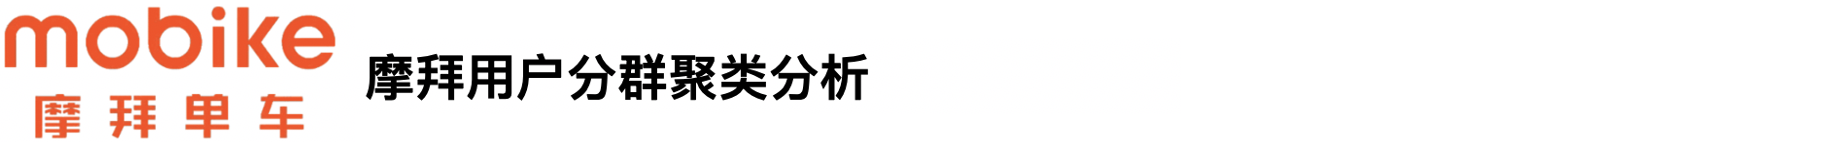

# 1 项目背景

摩拜单车，英文名Mobike，是由胡玮炜创办的北京摩拜科技有限公司研发的互联网短途出行解决方案，是无桩借还车的智能硬件。人们通过智能手机就能快速租用和归还一辆摩拜单车，用可负担的价格来完成一次几公里的室内骑行。

由于一公里的出行是一个高频的需求场景，所以mobike单车累计了大量的用户基本信息以及骑行的数据，通过这些数据，能够帮助企业更好识别自己的客群画像和他们的骑行偏好。

项目委托：给用户分群贴标签

# 2 业务问题与分析思路

业务问题的定义，采取What-Why-How的逻辑框架对业务问题进行递进式拆析，其中，What是问题的表象，Why是导致表象的深层原因，How是针对原因所提出的改善表象的对策建议。据此所定义的业务问题为：

What：如何给用户分群并描述各群体特征？

Why：样本属性如何？选择哪些变量属性建立聚类模型？如何评估和优化模型的聚类效果？

思路:
1. 数据清洗、探索与预处理：从整体把握数据，刻画Mobike的主力消费群体画像；
2. 建模变量选择：从理论出发，选择不同维度或维度含义重叠较小、可能对群体进行分割的变量；后续需在模型优化步骤中根据评估结果调整变量进行优化。
3. 模型评估与优化：
    1. 模型评估分别采用Elbow method和silhouette coefficient两个指标综合评估
    2. 优化过程主要通过增减变量，查看Elbow method和silhouette coefficient两个指标的改善程度
4. 选出最优模型，并进行模型分群解读

How：如何根据分群结果，基于群体特征与偏好，提出营销方案，提高用户的的骑行意愿与骑行频率？

# 3 结论与业务建议

## 3.1 主要结论

1. Mobike的用户分布与骑行特征：
    1. 用户分布：男性(78.22%)、付费用户(96.97%)、年龄呈现右偏分布，约90%用户年龄在20~55岁之间；
    2. 骑行特征：用户的骑行时间和骑行距离分别均呈右偏分布，且骑行时间和骑行距离呈高度正相关关系，即骑行时间越长骑行距离也越长。

2. 建模变量选择：
    1. 选择用户属性变量（usertype、gender、age）和用户骑行属性变量（timeduration、tripduration）共五个变量纳入模型，剩下变量与业务无关，不纳入模型。

3. 建模结果：
    1. 根据SSE（Sum of the squared errors, 误差平方和）和silhouette coefficient评估指标，发现模型最优分群为4组，分别是0群、1群、2群、3群
    2. 变量分群效果程度从大到小依次为：usertype、gender、tripduration/timeduration、age：
        1. usertype 显著区分了3群和其他三个群0,1,2：0,1,2群为付费用户，3群为未付费用户;
        2. gender 区分了0,1群和2,3群：0,1群主要为男性用户，2,3群主要为女性用户;
        3. timeduration/tripduration 两个变量效果一致，区分了0,2群和1,3群：0,2群骑行时间(7min、8min)和骑行路程(483m、563m)均相对较短，1,3群骑行时间(26min，20min)和骑行路程(1535m、1188m)均相对较长;
        4. age 分群效果不是很显著，区分了0,1群和2,3群：0,1群的年龄中心分别在37、38岁附近，2,3群的年龄中心分别在34、33岁附近。
    3. 群属性及群标签：
        1. 0群：付费、男性、37岁左右，骑行时长和里程分别约为7min、483m左右——标签：付费、男性、骑行时间里程短
        2. 1群：付费、男性、38岁左右，骑行时长和里程分别约为26min、1535m左右——标签：付费、男性、骑行时间里程长
        3. 2群：付费、女性、34岁左右，骑行时长和里程分别约为8min、563m左右——标签：付费、女性、骑行时间里程短
        4. 3群：未付费、女性、33岁左右，骑行时长里程分别约为20min、1188m左右——标签：未付费、女性、骑行时间里程长

## 3.2 业务建议
可以针对不同用户群体的核心特征提出营销建议，如：
1. 针对未付费群体（3群：未付费、女性、骑行时间里程长）：如骑行时长里程兑换Mobike付费优惠券，用优惠券吸引用户转化付费；
2. 针对骑行里程短、付费群体（0群：付费、男性、骑行时间里程短，2群：付费、女性、骑行时间里程短）：如骑行时长里程助力环保，换取线下合作店铺消费优惠，或者续费优惠券，提高用户的使用次数和续费概率，增加用户粘性。

# 4 数据分析与建模 

## 4.1 数据探索

In [2]:
# 调包
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
plt.rcParams['font.sans-serif'] = 'SimHei'

# 读取数据
mb = pd.read_csv('hw4_Mobike.csv')
# 查看数据属性，检查是否有空值
print('数据属性信息：')
print(mb.info())
print(mb.shape,end='\n\n')
# 检查是否有重复值
print('重复行数：')
print(mb.duplicated().sum(), end='\n\n')
# 检查数字型变量异常值
mb.describe()

数据属性信息：
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6427 entries, 0 to 6426
Data columns (total 15 columns):
Unnamed: 0           6427 non-null int64
user_id              6427 non-null int64
start_time           6427 non-null object
end_time             6427 non-null object
timeduration         6427 non-null int64
bikeid               6427 non-null int64
tripduration         6427 non-null int64
from_station_id      6427 non-null int64
from_station_name    6427 non-null object
to_station_id        6427 non-null int64
to_station_name      6427 non-null object
usertype             6427 non-null object
gender               5938 non-null object
birthyear            5956 non-null float64
age                  6427 non-null object
dtypes: float64(1), int64(7), object(7)
memory usage: 753.2+ KB
None
(6427, 15)

重复行数：
0



,Unnamed: 0,user_id,timeduration,bikeid,tripduration,from_station_id,to_station_id,birthyear
count,6427.000000,6.427000e+03,6427.000000,6427.000000,6.427000e+03,6427.000000,6427.000000,5956.000000
mean,317005.228411,2.135519e+07,11.778902,3491.637934,1.060471e+03,195.038432,198.502567,1982.488583
std,184583.896111,2.181294e+05,9.692236,1912.171846,1.456811e+04,148.170025,148.939873,11.147859
min,51.000000,2.098358e+07,0.000000,2.000000,6.100000e+01,2.000000,2.000000,1906.000000
25%,159093.000000,2.116805e+07,5.000000,1852.000000,3.490000e+02,77.000000,80.000000,1977.000000
50%,314569.000000,2.135114e+07,9.000000,3618.000000,5.590000e+02,168.000000,172.000000,1986.000000
75%,476273.500000,2.154376e+07,15.000000,5179.500000,9.320000e+02,287.000000,287.000000,1991.000000
max,642522.000000,2.174223e+07,59.000000,6470.000000,1.139070e+06,662.000000,661.000000,2002.000000


##### 小结
1. 数据共有6427行，14个属性变量(Unnamed: 0无业务意义)；
2. 属性字典：
    1. 用户属性变量：
        1. user_id：用户id
        2. usertype：用户类型(Subscriber付费用户/Customer一般用户)
        3. gender：性别(Male/Famale)
        4. birthyear：用户出生年份
        5. age：年龄
    2. 用户骑行属性变量：
        1. start_time：开始时间
        2. end_time：结束时间
        3. timeduration：骑行时间
        4. tripduration：骑行距离
    3. 车辆及站台属性：
        1. bikeid：自行车id
        2. from_station_id：开始站id
        3. from_station_name：开始站名字
        4. to_station_id：结束站id
        5. to_station_name：结束站名字
3. gender、birthyear两个字段存在空值，共占7.6%，采取删除处理；
4. age字段由object改为int字段
5. tripduration字段max为1139km，存在极端值，经过分析发现该字段的99%分位数为3.402km（删除空值后），为防止极端值影响，删除该字段后1%的数据

## 4.2 数据清洗

In [3]:
# 删除异常值
mb = mb[mb['gender'].notnull()]
# 将age由object属性改为int
mb['age'] = mb['age'].astype('int')
# 删除tripduration后1%的数据
mb = mb[mb['tripduration']<= mb['tripduration'].quantile(0.99)]
# 检查异常值删除情况
print(mb.info())
# 再次检查字段
mb.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5878 entries, 0 to 6426
Data columns (total 15 columns):
Unnamed: 0           5878 non-null int64
user_id              5878 non-null int64
start_time           5878 non-null object
end_time             5878 non-null object
timeduration         5878 non-null int64
bikeid               5878 non-null int64
tripduration         5878 non-null int64
from_station_id      5878 non-null int64
from_station_name    5878 non-null object
to_station_id        5878 non-null int64
to_station_name      5878 non-null object
usertype             5878 non-null object
gender               5878 non-null object
birthyear            5878 non-null float64
age                  5878 non-null int64
dtypes: float64(1), int64(8), object(6)
memory usage: 734.8+ KB
None


,Unnamed: 0,user_id,timeduration,bikeid,tripduration,from_station_id,to_station_id,birthyear,age
count,5878.000000,5.878000e+03,5878.000000,5878.000000,5878.000000,5878.000000,5878.000000,5878.000000,5878.000000
mean,322888.716570,2.136215e+07,10.603777,3509.093399,665.673699,197.109901,200.695475,1982.511569,36.488431
std,184567.436493,2.181305e+05,8.006125,1915.522627,480.107213,147.933353,148.539909,11.101805,11.101805
min,51.000000,2.098358e+07,1.000000,2.000000,61.000000,2.000000,3.000000,1918.000000,17.000000
25%,166896.500000,2.117681e+07,5.000000,1859.500000,335.250000,77.000000,81.000000,1977.000000,28.000000
50%,327431.500000,2.136615e+07,8.000000,3635.500000,523.000000,173.000000,174.000000,1986.000000,33.000000
75%,481992.500000,2.155071e+07,14.000000,5207.000000,842.000000,288.000000,287.000000,1991.000000,42.000000
max,642522.000000,2.174223e+07,56.000000,6470.000000,3390.000000,662.000000,661.000000,2002.000000,101.000000


## 4.3 Mobike用户属性描述

Text(0.5, 1.0, '用户年龄分布')

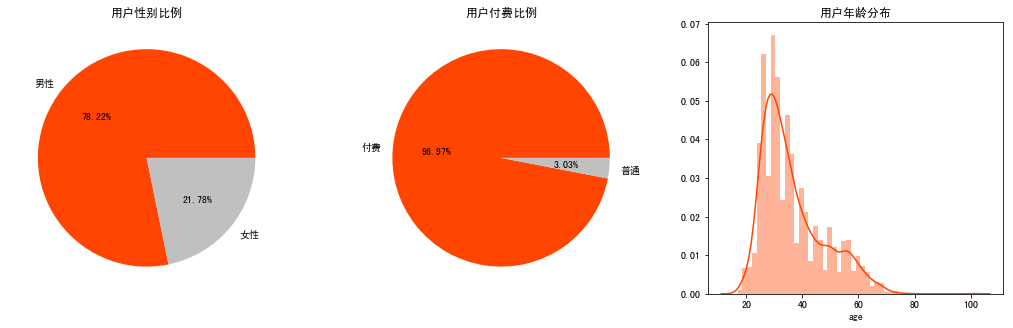

In [5]:
plt.figure(figsize=(18,5))

# 用户性别比例
plt.subplot(131)
data = mb['gender'].value_counts()
plt.pie(data, autopct='%0.2f%%', labels=['男性','女性'], colors=('orangered', 'silver'))
plt.title('用户性别比例')

# 用户付费比例
plt.subplot(132)
data = mb['usertype'].value_counts()
plt.pie(data, autopct='%0.2f%%', labels=['付费','普通'], colors=('orangered', 'silver'))
plt.title('用户付费比例')

# 用户年龄分布
plt.subplot(133)
sns.distplot(mb['age'], color='orangered')
plt.title('用户年龄分布')

小结：样本用户中，男性较多(78.22%)、付费用户较多(96.97%)、年龄呈现右偏分布，约90%用户年龄在20~55岁之间。

## 4.4 用户骑行行为属性描述

Text(0.5, 1.0, '骑行时间与骑行距离分布')

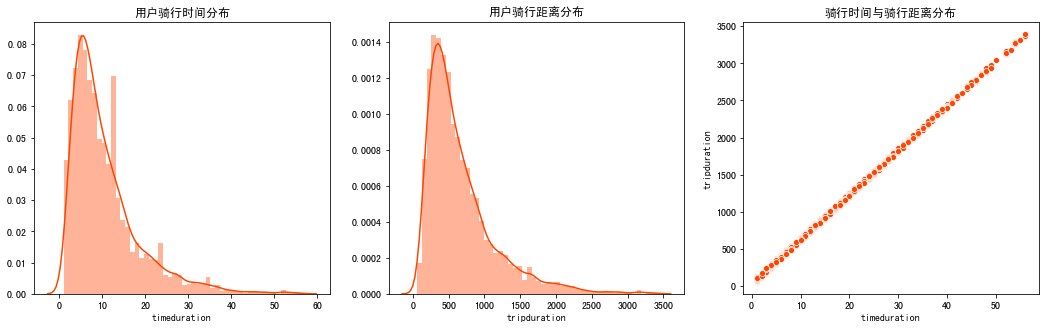

In [6]:
plt.figure(figsize=(18,5))

# 骑行时间分布
plt.subplot(131)
sns.distplot(mb['timeduration'], color='orangered')
plt.title('用户骑行时间分布')

# 骑行距离分布
plt.subplot(132)
sns.distplot(mb['tripduration'], color='orangered')
plt.title('用户骑行距离分布')

# 骑行时间与骑行距离分布
plt.subplot(133)
sns.scatterplot(x='timeduration', y='tripduration', data=mb, color='orangered')
plt.title('骑行时间与骑行距离分布')

小结：
用户的骑行时间和骑行距离分别均呈右偏分布，且骑行时间和骑行距离呈高度正相关关系，即骑行时间越长骑行距离也越长。

## 4.5 数据建模

### 4.5.1 建模数据准备

选择用户属性变量（usertype、gender、age）和用户骑行属性变量（timeduration、tripduration）共五个变量纳入模型，训练前需要进行标准化处理。此外，usertype和gengder为类别变量，纳入模型前需要进行哑变量处理

其余如用户id、start_time/end_time、车辆及站台属性（from_station_id/from_station_name/to_station_id/to_station_name：结束站名字）对分类无意义，不纳入模型。

In [10]:
# usertype哑变量处理
data = pd.get_dummies(mb)

# 选择建模变量
columns_name = ['usertype_Subscriber','gender_Male','age','timeduration','tripduration']
data = data[columns_name]

# 数据标准化
from sklearn.preprocessing import scale
data = pd.DataFrame(scale(data), columns= columns_name)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by the scale function.
  # Remove the CWD from sys.path while we load stuff.


### 4.5.2 建模、评估及优化

#### 4.5.2.1 Elbow methond

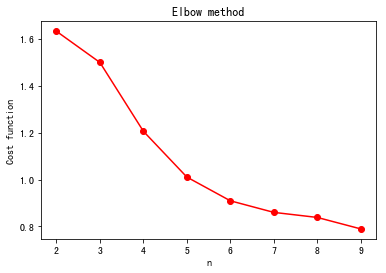

In [20]:
# 调包
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

# 变量SSE_score_list用于存储Elbow method的模型评估得分
SSE_score_list = []
# 将分群数量n设置为2~9 
n = range(2,10)
for i in n:
    # 模型实例化
    model = KMeans(n_clusters=i, random_state=100)
    # 训练模型
    model.fit(data)
    # 模型评估，并将评估得分进行保存
    SSE_score_list.append(sum(np.min(cdist(data, model.cluster_centers_, 'euclidean'), axis = 1))/data.shape[0])

# 模型评估指标画图
plt.plot(n, SSE_score_list, 'ro-')
plt.title('Elbow method')
plt.xlabel('n')
plt.ylabel('Cost function')
plt.show()

#### 4.5.2.2 silhouette coefficient

Text(0.5, 1.0, '不同分群数量的silhouette轮廓系数评分')

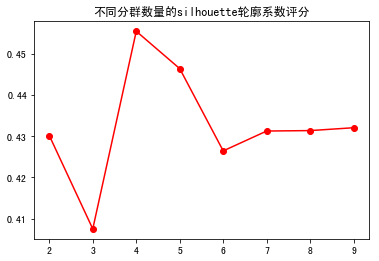

In [19]:
from sklearn import metrics

# 变量sil_score_list用于存储silhouette coefficient的模型评估得分
sil_score_list = []
# 将分群数量n设置为2~9 
n = range(2,10)
for i in n:
    # 模型实例化
    model = KMeans(n_clusters=i, random_state=100)
    # 训练模型
    model.fit(data)
    # 模型评估，并将评估得分进行保存
    sil_score_list.append(metrics.silhouette_score(data, model.labels_))

# 模型评估指标画图
plt.plot(n, sil_score_list, 'ro-')
plt.title('不同分群数量的silhouette轮廓系数评分')

小结：根据SSE（Sum of the squared errors, 误差平方和）和silhouette coefficient评估指标，发现模型最优分群为4组，分别是0群、1群、2群、3群。

### 4.5.3 模型解读

In [93]:
model = KMeans(n_clusters=4, random_state=100)
model.fit(data)
print('silhouette coefficient score:',metrics.silhouette_score(data, model.labels_))

# 输出每个群的中心/质心
centers = pd.DataFrame(model.cluster_centers_, columns=columns_name)
centers

silhouette coefficient score: 0.45542058872865704


,usertype_Subscriber,gender_Male,age,timeduration,tripduration
0,0.176715,0.527619,0.035002,-0.381000,-0.380788
1,0.176715,0.125277,0.089310,1.808523,1.809111
2,0.176715,-1.895307,-0.136373,-0.212816,-0.214317
3,-5.658840,-0.057694,-0.310706,1.086008,1.088088


小结：

1. 最优模型一共分为4个群，分别为：0群、1群、2群、3群
2. 变量分群效果程度从大到小依次为：usertype、gender、tripduration/timeduration、age
    1. usertype 显著区分了3群和其他三个群(0,1,2)：(0,1,2)群为付费用户，3群为未付费用户;
    2. gender 区分了[0,1]群和[2,3]群：[0,1]群主要为男性用户，(2,3)群主要为女性用户;
    3. timeduration/tripduration 两个变量效果一致，区分了[0,2]群和[1,3]群：[0,2]群骑行时间(7min、8min)和骑行路程(483m、563m)均相对较短，[1,3]群骑行时间(26min，20min)和骑行路程(1535m、1188m)均相对较长（具体数值采用标准化后的中心值进行了反推）;
    4. age 分群效果不是很显著，区分了[0,1]群和[2,3]群：[0,1]群的年龄中心分别在37、38岁附近，[2,3]群的年龄中心分别在34、33岁附近;
3. 群属性及群标签：
    1. 0群：付费、男性、37岁左右，骑行时长和里程分别约为7min、483m左右——标签：付费、男性、骑行时间里程短
    2. 1群：付费、男性、38岁左右，骑行时长和里程分别约为26min、1535m左右——标签：付费、男性、骑行时间里程长
    3. 2群：付费、女性、34岁左右，骑行时长和里程分别约为8min、563m左右——标签：付费、女性、骑行时间里程短
    4. 3群：未付费、女性、33岁左右，骑行时长和里程分别约为20min、1188m左右——标签：未付费、女性、骑行时间里程长